<h1><b>Exemplo Classificação de Imagens

Neste exemplo utilizaremos a biblioteca Tensorflow e Keras para montar um modelo de IA simples, voltada para classificação de imagens.

Para iniciarmos primeiramente é necesária a instalação dessas duas bibliotecas.

In [ ]:
!pip install tensorflow keras

Primeiramente precisamos importar os dados que usaremos para o treinamento de nossa IA, pra isso usaremos o dataset <a href="https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR-10</a>, que consiste de 60000 de 32x32 dividas em 10 classes(aviões, carros, passaros, gatos, cervos, cachorros, sapos, cavalos, návios e caminhões).

In [ ]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"X_train: {X_train.shape}") # 50000, 32, 32, 3
print(f"y_train: {y_train.shape}") # 50000, 1
print(f"X_test: {X_test.shape}")   # 10000, 32, 32, 3
print(f"y_test: {y_test.shape}")   # 10000, 1

Neste trecho definimos as labels para as imagens e fazemos o usa da <a href="https://matplotlib.org/">MatPlotLib</a> pra gerar um gráfico mostrando algumas imagens aleatórias apenas para demonstração.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

lbls = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog',
                'Frog', 'Horse', 'Ship', 'Truck']

fig, axes = plt.subplots(5,5, figsize = (10,10))
axes = axes.ravel()
for i in np.arange(0, 5*5):
    idx = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[idx])
    lbl_idx = int(y_train[idx][0])
    axes[i].set_title(lbls[lbl_idx], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Aqui um gráfico indicando a distribuição da quantidade de imagens de cada tipo de classe no dataset.

In [ ]:
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(lbls, counts)
plt.title('Class distribution in training set')

Nesse bloco pegamos a quantidade de pixels de todas as imagens que geralmente, variam de 0 a 255 e dividimos por 255.0, isso faz com que esses valores escalem de 0 a 1, ajudando a otimizar o treinamento.

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Neste trecho pegamos os arrays das labels das imagens e utilizamos <a href="https://www.geeksforgeeks.org/ml-one-hot-encoding/">one-hot encoding</a> pra transformar essas labels em vetores binários.

In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
print(y_train_cat[:10])
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)
print("\n")
print(y_test_cat[:10])

Na sequência pegamos os arrays com os dados de treinamento e fazemos uso da biblioteca <a href="https://scikit-learn.org/stable/index.html">scikit-learn</a> para randomizar os dados.

In [7]:
from sklearn.model_selection import train_test_split

X_TRAIN, X_VAL, Y_TRAIN, Y_VAL = train_test_split(X_train,
                                                y_train_cat,
                                                test_size=0.2,
                                                random_state=42)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64
data_generator = ImageDataGenerator(horizontal_flip=True)

train_generator = data_generator.flow(X_TRAIN, Y_TRAIN, batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

INPUT_SHAPE = (32, 32, 3)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

In [10]:
model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy']
              )

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=(X_VAL, Y_VAL),
                    )

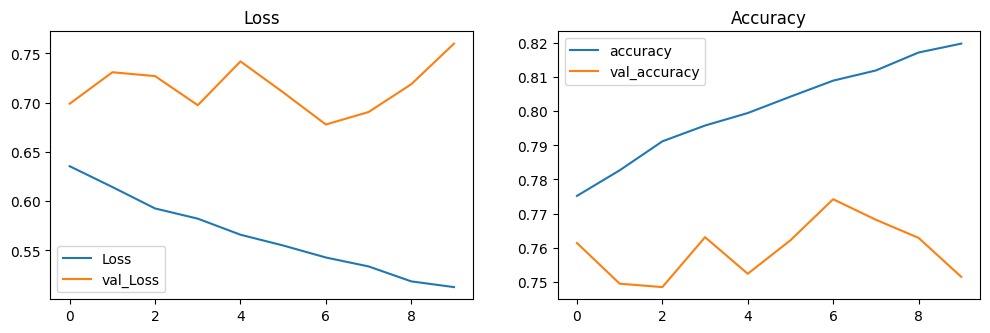

In [169]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


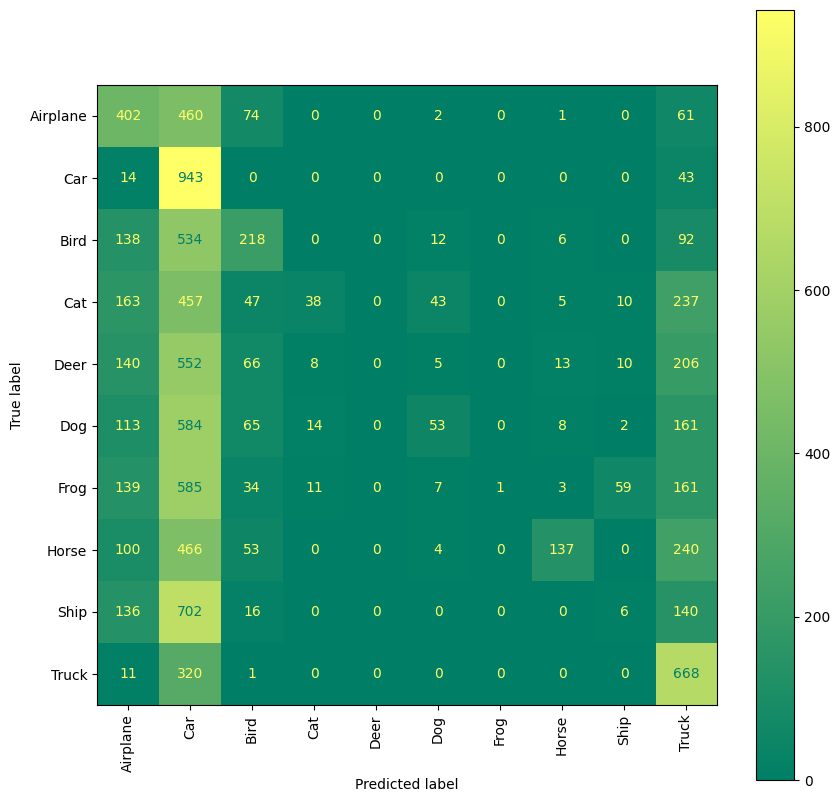

In [166]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

con = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lbls)

fig, ax = plt.subplots(figsize=(10, 10))
con = con.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
import random
idx = random.randint(0, len(X_test))
im = X_test[idx]
plt.imshow(im)

pred_t = np.argmax(model.predict(im.reshape(1, 32, 32, 3)))
print(pred_t)
print(f"our model predicts that image {idx} is {lbls[pred_t]}")